<a href="https://colab.research.google.com/github/MatteoGhizzi/MLPNS2021/blob/main/LEZ17_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pylab as pl
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
# you will use astropy to make the contours-scatter plot
from astropy import constants as const
from astropy import units as u
pylab.style.use("https://raw.githubusercontent.com/fedhere/MLPNS2021/main/fbb.mplstyle")


In [3]:
url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI"
url +="?table=k2targets&select=epic_number,k2_teff,k2_rad"
url +="&format=CSV"

In [4]:
df = pd.read_csv(url)
df.head()

,epic_number,k2_teff,k2_rad
0,60018365,NaN,NaN
1,60018369,NaN,NaN
2,60018371,NaN,NaN
3,60018372,NaN,NaN
4,60018374,NaN,NaN


In [6]:
# aggiungo la colonna luminosità
df['Luminosity'] = 4 * np.pi * (df['k2_rad'] * const.R_sun) ** 2 * \
                  const.sigma_sb * df['k2_teff'] **4


In [7]:
df.head()

,epic_number,k2_teff,k2_rad,Luminosity
0,60018365,NaN,NaN,NaN
1,60018369,NaN,NaN,NaN
2,60018371,NaN,NaN,NaN
3,60018372,NaN,NaN,NaN
4,60018374,NaN,NaN,NaN


# scatter plot H-R diagram

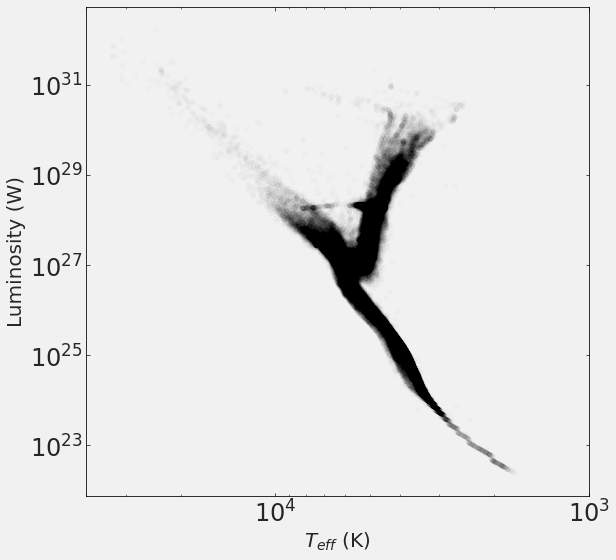

In [13]:
df.plot.scatter(x='k2_teff', y='Luminosity', loglog= True, color='k', 
                figsize=(9,9), alpha=0.01)
# alpha regola la trasparenza
plt.xlim(40000,1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)');

Anche variando la trapsrenza dei punti (alpha) l'elevata densità di punti all'interno della figura non la rende interpretabile

## astroML

In [16]:
# non funziona con i NaN
teff_na = df['k2_teff'].dropna()
L_na = df['Luminosity'].dropna()


In [14]:
!pip install astroML

     |████████████████████████████████| 112kB 9.1MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-cp37-none-any.whl size=128664 sha256=f5be833af8d09da8f3c05eba06a608a6be4273fb6bd35641ba9744030d4d80aa
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroML


In [20]:
plt.contourf?

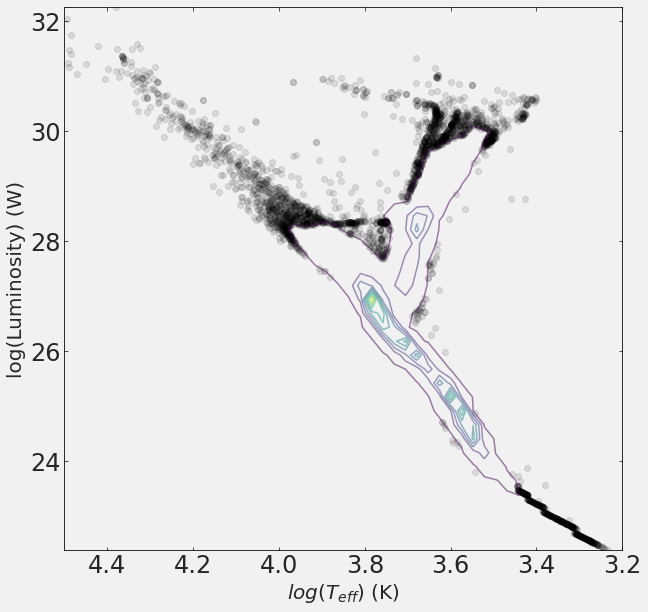

In [28]:
from astroML import plotting
#rememnber that you are making a log-log plot
ax = plt.figure(figsize=(10,10)).add_subplot()
#ricordiamoci che il plot precedente era un loglog plot...

plotting.scatter_contour(ax=ax, x= np.log10(teff_na), y= np.log10(L_na),
                         filled_contour= False, #contorni pieni o vuoti
                         histogram2d_args={'bins':(50,40)},
                         plot_args={'marker':'o', 'alpha':0.1, 'color':'k'},
                         contour_args={'alpha':0.5})

plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)')
plt.xlim(4.5, 3.2)
plt.savefig("k2scatter_contour.png")